In [1]:
#Importing the required libraries of python....
import pandas as pd
from numpy import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
#importing the dataset from drive.....
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#reading the provided dataset....
pd.set_option('display.max_columns', None)
Bdf=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/employee_burnout_analysis.xlsx - in.csv")
Bdf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30/9/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30/11/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10/3/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,3/11/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24/7/2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30/12/2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19/1/2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,5/11/2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10/1/2008,Female,Service,No,2,5.0,5.9,0.52


In [3]:
 #Getting the info of complete dataset.....
Bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [4]:
Bdf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [5]:
# Showing the unique values from the dataset
for i,col in enumerate(Bdf.columns):
  print(f"\n\n{Bdf[col].unique()}")
  print(f"\n{Bdf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['30/9/2008' '30/11/2008' '10/3/2008' '3/11/2008' '24/7/2008' '26/11/2008'
 '2/1/2008' '31/10/2008' '27/12/2008' '9/3/2008' '16/3/2008' '12/5/2008'
 '20/1/2008' '23/2/2008' '14/5/2008' '3/2/2008' '17/3/2008' '28/3/2008'
 '29/5/2008' '27/6/2008' '31/8/2008' '15/1/2008' '4/5/2008' '17/11/2008'
 '14/9/2008' '9/10/2008' '11/10/2008' '18/9/2008' '16/9/2008' '16/12/2008'
 '3/5/2008' '4/8/2008' '31/7/2008' '17/6/2008' '28/4/2008' '30/10/2008'
 '27/2/2008' '22/6/200

In [6]:
#CHECKING THE SKEWNESS OF THE ATTRIBUTES..
intFloatBdf=Bdf.select_dtypes([np.int, np.float])
for i,col in enumerate(intFloatBdf.columns):
  if(intFloatBdf[col].skew()>=0.1):
    print("\n",col,"FEATURE IS POSITIVELY SKEWED AND VALUE IS : " ,intFloatBdf[col].skew())
  elif (intFloatBdf[col].skew()<=0.1):
    print("\n",col,"FEATURE IS NEGATIVELY SKEWED AND VALUE IS : " ,intFloatBdf[col].skew())
  else:
    print("\n",col,"FEATURE IS NORMALLY DISTRIBUTED AND VALUE IS : " ,intFloatBdf[col].skew())


 Designation FEATURE IS NEGATIVELY SKEWED AND VALUE IS :  0.09242138478903683

 Resource Allocation FEATURE IS POSITIVELY SKEWED AND VALUE IS :  0.20457273454318103

 Mental Fatigue Score FEATURE IS NEGATIVELY SKEWED AND VALUE IS :  -0.4308950578815428

 Burn Rate FEATURE IS NEGATIVELY SKEWED AND VALUE IS :  0.045737370909640515


In [7]:
#IN CASE OF NULL VALUES ,REPLACE THEM WITH MEAN....
Bdf['Resource Allocation'].fillna(Bdf['Resource Allocation'].mean(),inplace=True)
Bdf['Mental Fatigue Score'].fillna(Bdf['Mental Fatigue Score'].mean(),inplace=True)
Bdf['Burn Rate'].fillna(Bdf['Burn Rate'].mean(),inplace=True)

In [8]:
#CHECKING FOR NULL VALUES.....
Bdf.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

# **DATA VISUALIZATION**

---



In [9]:
#PLOTTING HEATMAP TO CHECK CORRELATION...
corr=Bdf.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig=px.imshow(corr,text_auto=True, aspect="auto")
fig.show()

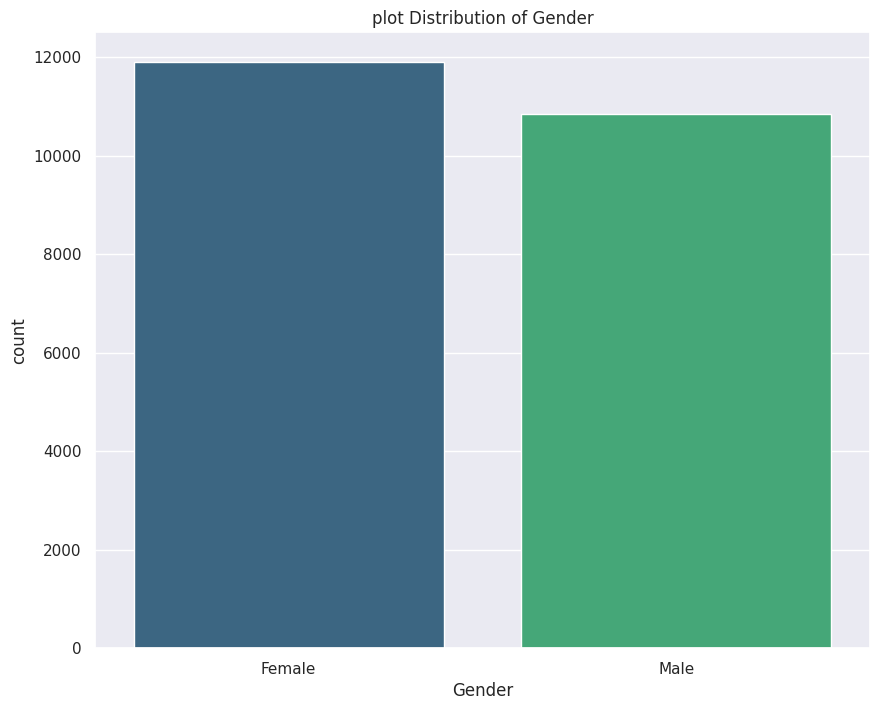

In [10]:
#PLOT DISTRIBUTION OF "Gender"...
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=Bdf,palette="viridis")
plt.title("plot Distribution of Gender")
plt.show()

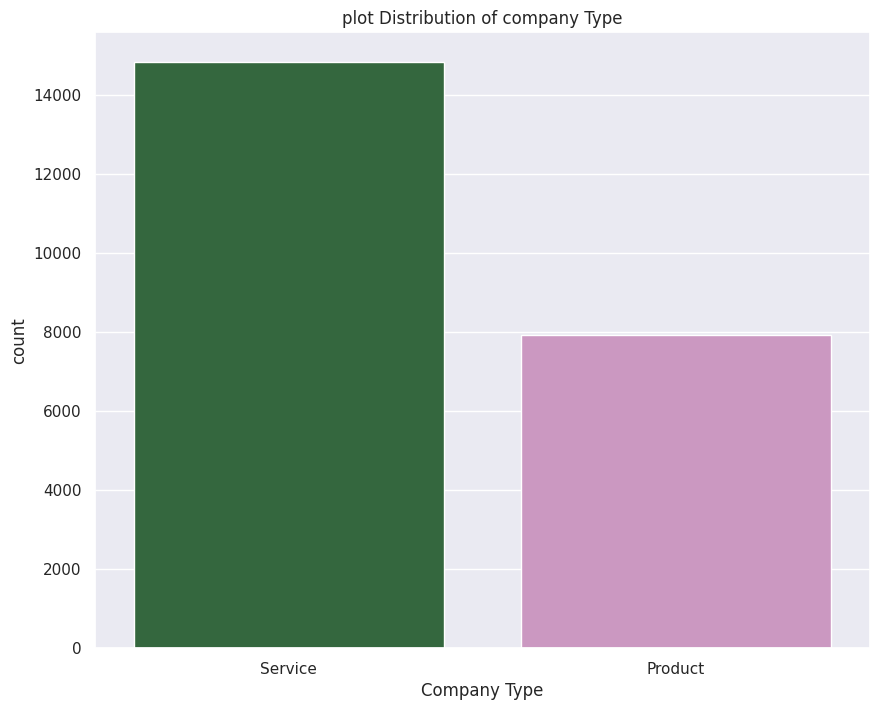

In [11]:
#COUNT PLOT DISTRIBUTION OF "Company Type"...
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=Bdf,palette="cubehelix")
plt.title("plot Distribution of company Type")
plt.show()

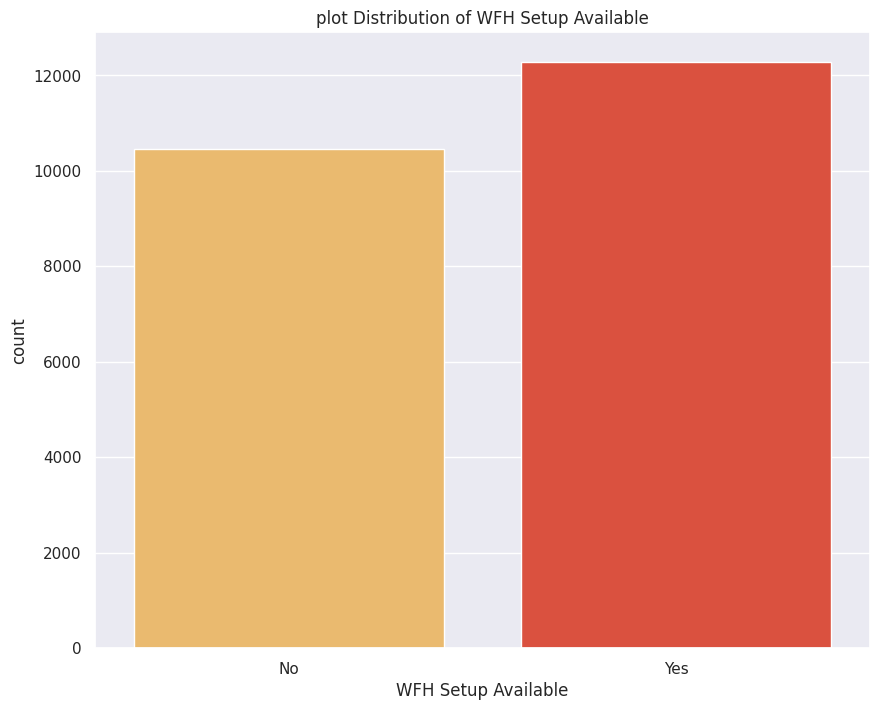

In [12]:
#COUNT PLOT DISTRIBUTION OF "WORK FROM HOME SETUP AVAILABILITY"...
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=Bdf,palette="YlOrRd")
plt.title("plot Distribution of WFH Setup Available")
plt.show()

In [13]:
#Count plot Distribution of attributes with the help of Histogram...
b_st=Bdf.loc[:,'Date of Joining':'Burn Rate']
b_st=b_st.select_dtypes([int,float])
for i,col in enumerate(b_st.columns):
  fig=px.histogram(b_st,x=col,title="Plot distribution of "+col, color_discrete_sequence=['coral'])
  fig.update_layout(bargap=0.3)
  fig.show()

In [14]:
#plot distribution of Burn rate on the basis of designation
fig=px.line(Bdf, y="Burn Rate", color="Designation", title="BURN RATE ON THE BASIS OF DESIGNATION", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
#plot distribution of Mental Fatigue Score on the basis of designation
fig=px.line(Bdf, y="Mental Fatigue Score", color="Designation", title="Mental Fatigue Score vs Designation", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

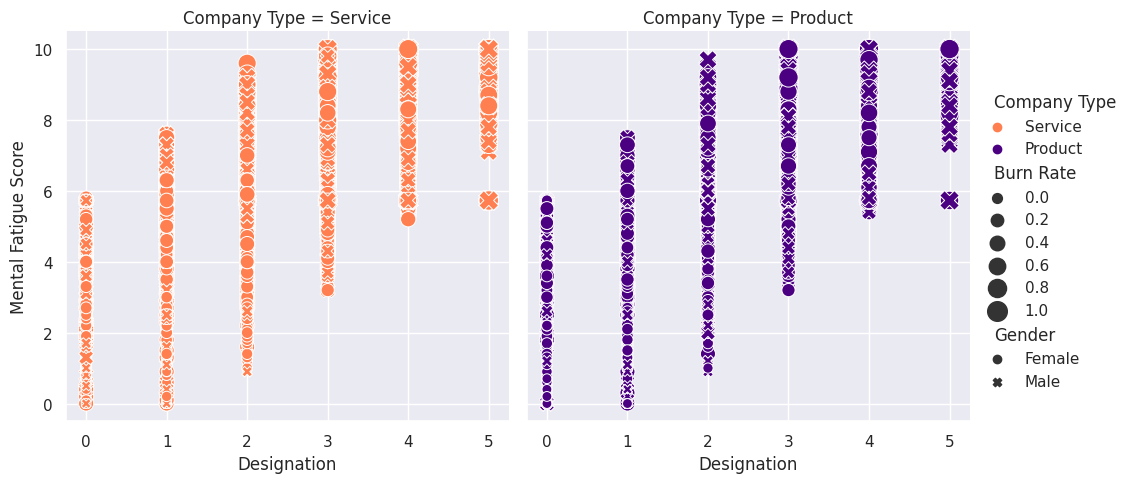

In [16]:
#plot distribution of "DESIGNATION vs MENTAL FATIGUE" as per company type,burn rate and gender
sns.relplot(
    data=Bdf,x="Designation",y="Mental Fatigue Score",col="Company Type",
    hue="Company Type", size="Burn Rate",style="Gender",
    palette=["coral","indigo"],sizes=(50,200)
)

# **LABEL ENCODING**

---



In [17]:
#Label encoding  and assign in new variable.....
from sklearn import preprocessing
L_e=preprocessing.LabelEncoder()

In [18]:
#Assigning in new variable....
Bdf['GenderLabel']=L_e.fit_transform(Bdf['Gender'].values)
Bdf['Company_TypeLabel']=L_e.fit_transform(Bdf['Company Type'].values)
Bdf['WFH_Setup_AvailableLabel']=L_e.fit_transform(Bdf['WFH Setup Available'].values)

In [19]:
#Checking the assigned values....
gn=Bdf.groupby('Gender')
gn=gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [20]:
gn=Bdf.groupby('Company Type')
gn=gn['Company_TypeLabel']
gn.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [21]:
gn=Bdf.groupby('WFH Setup Available')
gn=gn['WFH_Setup_AvailableLabel']
gn.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [22]:
#Printing the last 10 rows....
Bdf.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22740,fffe33003300380031003100,5/9/2008,Female,Product,No,3,6.0,7.300000,0.550000,0,0,0
22741,fffe31003600350034003800,7/1/2008,Male,Product,No,2,5.0,6.000000,0.452005,1,0,0
22742,fffe33003200310039003000,28/7/2008,Male,Product,No,3,5.0,8.100000,0.690000,1,0,0
22743,fffe3300390030003600,15/12/2008,Female,Product,Yes,1,3.0,6.000000,0.480000,0,0,1
22744,fffe32003500370033003200,27/5/2008,Male,Product,No,3,7.0,6.200000,0.540000,1,0,0
22745,fffe31003500370039003100,30/12/2008,Female,Service,No,1,3.0,5.728188,0.410000,0,1,0
22746,fffe33003000350031003800,19/1/2008,Female,Product,Yes,3,6.0,6.700000,0.590000,0,0,1
22747,fffe390032003000,5/11/2008,Male,Service,Yes,3,7.0,5.728188,0.720000,1,1,1
22748,fffe33003300320036003900,10/1/2008,Female,Service,No,2,5.0,5.900000,0.520000,0,1,0
22749,fffe3400350031003800,6/1/2008,Male,Product,No,3,6.0,7.800000,0.610000,1,0,0


# **FEATURE SELECTION**

---



In [23]:
#FEATURE SELECTION
column=['Designation','Resource Allocation','Mental Fatigue Score',
        'GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLabel']
x=Bdf[column]
y=Bdf['Burn Rate']
#printing x :
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLabel  
0         

In [24]:
#printing y :
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


# **IMPLEMENTING PRINCIPLE COMPONENT ANALYSIS**

---



In [25]:
#PCA..
from sklearn.decomposition import PCA
pca=PCA(0.99)
x_pca=pca.fit_transform(x)
print("PCA shape of x is :",x_pca.shape,"and original shape is : ",x.shape)
print("Percentage of importance of selected features is : ",pca.explained_variance_ratio_)
print("The number of features selected through PCA is : ",pca.n_components_)


PCA shape of x is : (22750, 6) and original shape is :  (22750, 6)
Percentage of importance of selected features is :  [0.78371089 0.11113597 0.03044541 0.02632422 0.02438192 0.02400159]
The number of features selected through PCA is :  6


# **DATA SPLITTING**

---



In [26]:
#The given dataset is divided into training and testing datasets.....
from sklearn.model_selection import train_test_split
X_train_pca,X_test,Y_train,Y_test=train_test_split(x_pca,y,test_size=0.35,random_state=20)
#printing the shape of splitted data...
print(X_train_pca.shape,X_test.shape,Y_train.shape,Y_test.shape)

(14787, 6) (7963, 6) (14787,) (7963,)


# **MODEL IMPLEMENTATION**

---



*RANDOM FOREST REGRESSOR*

In [27]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train_pca,Y_train)
train_pred_rf=rf_model.predict(X_train_pca)
train_r2=r2_score(Y_train, train_pred_rf)
test_pred_rf=rf_model.predict(X_test)
test_r2=r2_score(Y_test,test_pred_rf)
#Accuracy score
print("ACCURACY SCORE OF TRAIN DATA:"+str(round(100*train_r2,4))+" %")
print("ACCURACY SCORE OF TEST DATA:"+str(round(100*train_r2,4))+" %")

ACCURACY SCORE OF TRAIN DATA:91.7118 %
ACCURACY SCORE OF TEST DATA:91.7118 %


In [28]:
#How many employees are extreamly burned out (having burn rate greater than 0.7 ?
extream_burn_rate_df = Bdf[Bdf["Burn Rate"] >= 0.7]
extreamly_burned_out_count = extream_burn_rate_df["Burn Rate"].count()
print("Number of employees who are extreamly burned out =", extreamly_burned_out_count)

percent = extreamly_burned_out_count / len(Bdf)
print("Percentage of exmployees who fall under Extreamly burned out = " , percent * 100, " %")

Number of employees who are extreamly burned out = 2403
Percentage of exmployees who fall under Extreamly burned out =  10.562637362637362  %


In [29]:
#How many employees are moderately burned out (having burn rate greater than 0.5 and less thatn 0.7) ?
moderate_burn_rate_df = Bdf[(Bdf["Burn Rate"] >= 0.5) & (Bdf["Burn Rate"] < 0.7)]
moderately_burned_out_count = moderate_burn_rate_df["Burn Rate"].count()
print("Number of employees who are moderately burned out =", moderately_burned_out_count)

percent = moderately_burned_out_count / len(Bdf)
print("Percentage of exmployees who fall under Moderately burned out = " , percent * 100, " %")

Number of employees who are moderately burned out = 6625
Percentage of exmployees who fall under Moderately burned out =  29.120879120879124  %


In [30]:
#How many employees are slightly burned out (having burn rate greater than 0.5 and less thatn 0.7) ?
slightly_burn_rate_df = Bdf[(Bdf["Burn Rate"] > 0.0) & (Bdf["Burn Rate"] < 0.5)]
slightly_burned_out_count = slightly_burn_rate_df["Burn Rate"].count()
print("Number of employees who are slightly burned out =", slightly_burned_out_count)

percent = slightly_burned_out_count / len(Bdf)
print("Percentage of exmployees who fall under Slightly burned out = " , percent * 100, " %")


Number of employees who are slightly burned out = 13450
Percentage of exmployees who fall under Slightly burned out =  59.120879120879124  %


In [31]:
#How many employees are not burned out at all ?
no_burn_rate_df = Bdf[Bdf["Burn Rate"] == 0]
no_burned_out_count = no_burn_rate_df["Burn Rate"].count()
print("Number of employees who are not burned out =", no_burned_out_count)

percent = no_burned_out_count / len(Bdf)
print("Percentage of exmployees who fall under No burned out = " , percent * 100, " %")

Number of employees who are not burned out = 272
Percentage of exmployees who fall under No burned out =  1.1956043956043956  %


In [32]:
Bdf['Burnout Category'] = np.where(
    Bdf['Burn Rate'] > 0.7, "Extreme", #Else below
    np.where((Bdf["Burn Rate"] >= 0.5) & (Bdf["Burn Rate"] < 0.7), "Moderate", #else below
    np.where(Bdf['Burn Rate'] < 0.5, "Slight", "No Burnout"  )))


In [33]:
males_count_extreme = Bdf[(Bdf['Burnout Category'] == "Extreme") & ((Bdf['Gender'] == "Male"))]['Burnout Category'].count()
males_count_moderate = Bdf[(Bdf['Burnout Category'] == "Moderate") & ((Bdf['Gender'] == "Male"))]['Burnout Category'].count()
males_count_slight = Bdf[(Bdf['Burnout Category'] == "Slight") & ((Bdf['Gender'] == "Male"))]['Burnout Category'].count()

print("Number of males with Extreme Burnout = ", males_count_extreme)
print("Number of males with Moderate Burnout = ", males_count_moderate)
print("Number of males with Slight Burnout = ", males_count_slight)


Number of males with Extreme Burnout =  1300
Number of males with Moderate Burnout =  3865
Number of males with Slight Burnout =  5557


In [34]:
females_count_extreme = Bdf[(Bdf['Burnout Category'] == "Extreme") & ((Bdf['Gender'] == "Female"))]['Burnout Category'].count()
females_count_moderate = Bdf[(Bdf['Burnout Category'] == "Moderate") & ((Bdf['Gender'] == "Female"))]['Burnout Category'].count()
females_count_slight = Bdf[(Bdf['Burnout Category'] == "Slight") & ((Bdf['Gender'] == "Female"))]['Burnout Category'].count()

print("Number of females with Extreme Burnout = ", females_count_extreme)
print("Number of females with Moderate Burnout = ", females_count_moderate)
print("Number of females with Slight Burnout = ", females_count_slight)

Number of females with Extreme Burnout =  898
Number of females with Moderate Burnout =  2760
Number of females with Slight Burnout =  8165


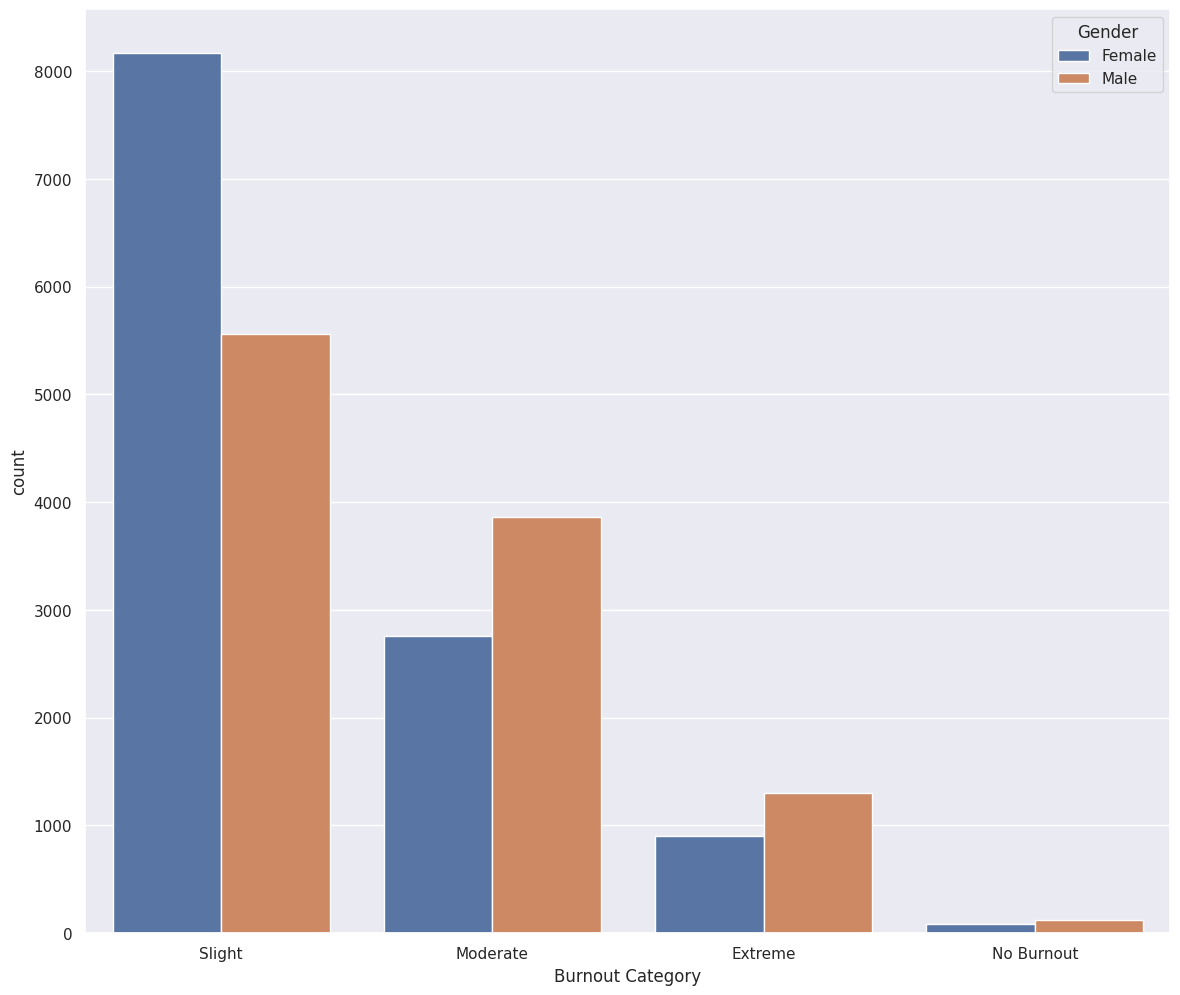

In [35]:
sns.countplot(x = "Burnout Category", data = Bdf, hue = "Gender");


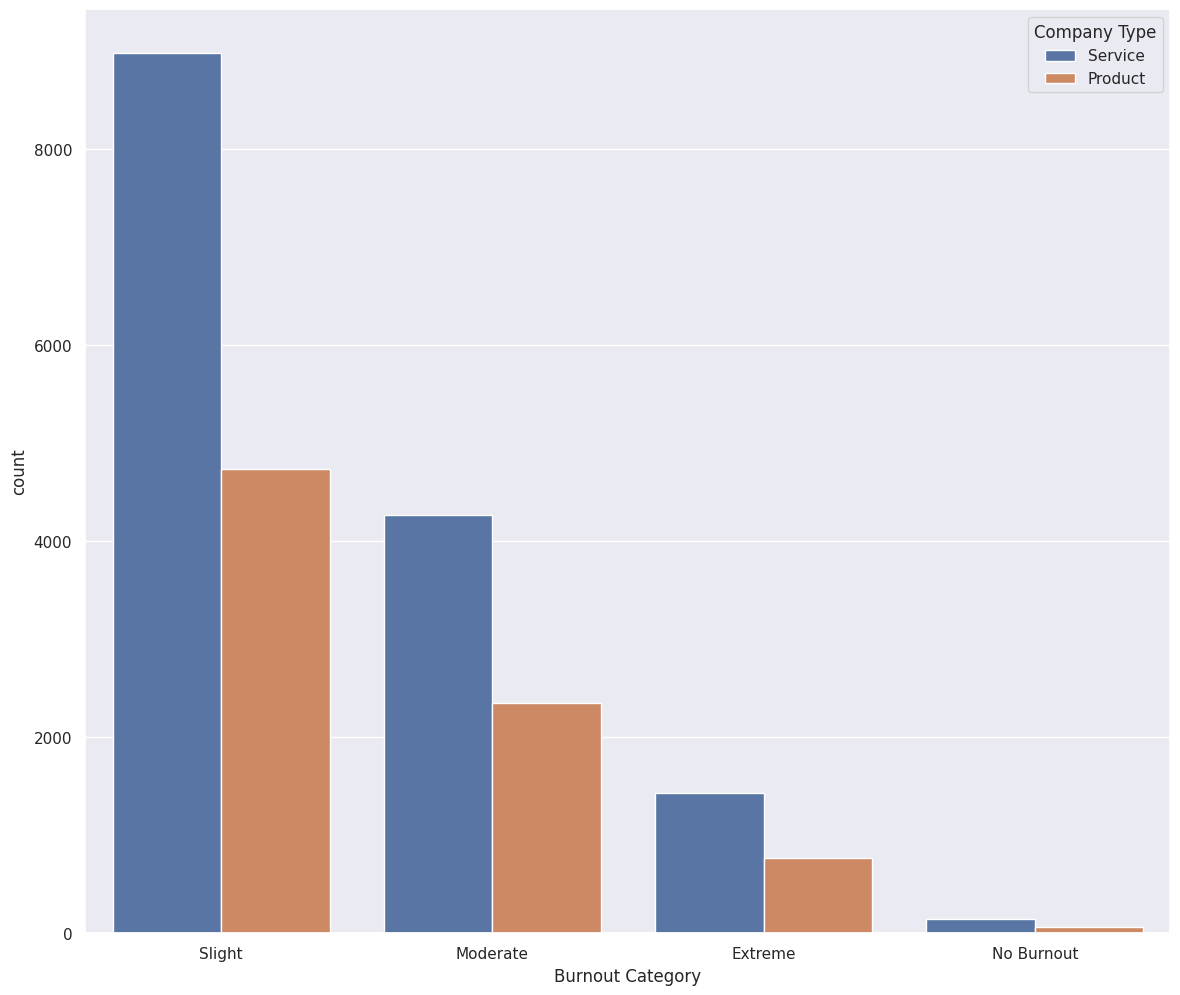

In [36]:
sns.countplot(x = "Burnout Category", data = Bdf, hue = "Company Type");

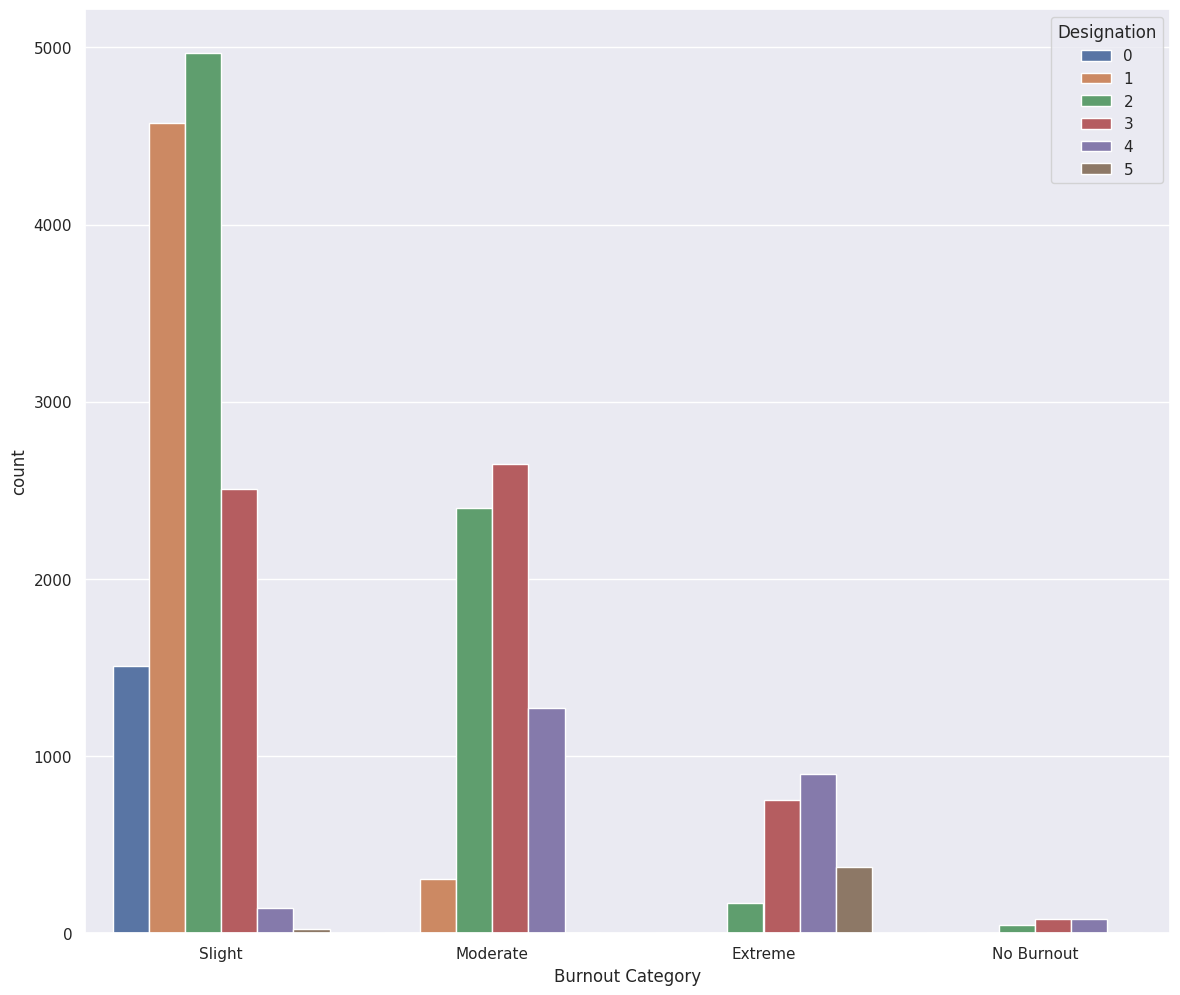

In [37]:
sns.countplot(x = "Burnout Category", data = Bdf, hue = "Designation");


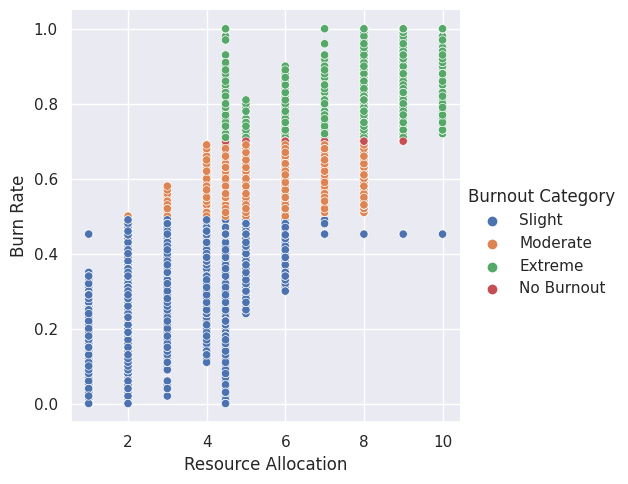

In [38]:
sns.relplot(x = "Resource Allocation", y = "Burn Rate", data = Bdf, hue = "Burnout Category");

# **Conclusions**

---
Here is the list of few conclusions made based on the data -

*   11 % of total employees are extreamly burned out
*   30 % of total employees are moderately burned out
*   60 % of total employees are slightly burned out
*   Only 2 % of total employees are not burned out
* Overall, Males are more burned out compared to females as majority of females are slightly burnedout while majority of males are moderately and extremely burnedout
* Employees working in a Service based company are more Burned-out compared to an employee working in a Product based company

